In [20]:
import gc
gc.collect()
import pandas as pd

In [57]:
#csvからデータを取得
customer_master = pd.read_csv('customer_master.csv')
item_master = pd.read_csv('item_master.csv')
transaction1 = pd.read_csv('transaction_1.csv')
transaction2 = pd.read_csv('transaction_2.csv')
transaction_detail_1 = pd.read_csv('transaction_detail_1.csv')
transaction_detail_2 = pd.read_csv('transaction_detail_2.csv')

# データを俯瞰する
print(customer_master.shape)
display(customer_master.head())

print(item_master.shape)
display(item_master.head())

print(transaction1.shape)
display(transaction1.head())
print(transaction2.shape)
display(transaction2.head())

print(transaction_detail_1.shape)
display(transaction_detail_1.head())
print(transaction2.shape)
display(transaction_detail_2.head())

(5000, 9)


,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


(5, 3)


,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


(5000, 4)


,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


(1786, 4)


,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


(5000, 4)


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


(1786, 4)


,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


In [58]:
# transactionデータをタテに繋げる（ユニオン）
print('transacrion1: {}'.format(transaction1.shape))
print('transacrion2: {}'.format(transaction2.shape))

transaction = pd.concat([transaction1, transaction2], ignore_index = True)

print('-> transacrion: {}'.format(transaction.shape))


transacrion1: (5000, 4)
transacrion2: (1786, 4)
-> transacrion: (6786, 4)


In [59]:
# 同様に詳細データもユニオンする
print('transaction_detail_1: {}'.format(transaction_detail_1.shape))
print('transaction_detail_2: {}'.format(transaction_detail_2.shape))

transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index = True)

print('-> transaction_detail: {}'.format(transaction_detail.shape))

transaction_detail_1: (5000, 4)
transaction_detail_2: (2144, 4)
-> transaction_detail: (7144, 4)


In [61]:
display(transaction.head())
display(transaction_detail.head())

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [62]:
# 一番小さな粒度のtrannsaction_detailに合わせて横に結合していく。(ジョイン)
# 1.transactionの2つのdfはtransaction_idをキーに結合
# 2.transactionとitemdfはitem_idをキーに結合
# 3.transactionとcustomerdfはcustomer_idをキーに結合
# もしかしたら、detail_idは必要ないかも

# 重要なのは、とにかくすべてを横に結合するのではなく、必要なデータの結びつけること

In [63]:
# 一番細かいtransaction_detailから加えていく
# transactionのpriceは、detailのデータとの2重形状になってしまうため除く

print('transaction_detail: {}'.format(transaction_detail.shape))
print('transaction: {}'.format(transaction.shape))

join_data = pd.merge(transaction_detail, transaction[['transaction_id', 'payment_date', 'customer_id']], on = 'transaction_id', how = 'left')

print('-> join_data: {}'.format(join_data.shape))

transaction_detail: (7144, 4)
transaction: (6786, 4)
-> join_data: (7144, 6)


In [64]:
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [65]:
# 同様にジョインしていく
print('{}'.format(join_data.shape))

join_data = pd.merge(join_data, customer_master[['customer_id', 'customer_name', 'registration_date', 'customer_name_kana', 'email', 'gender', 'age', 'birth', 'pref']], on = 'customer_id', how = 'left')
print('->{}'.format(join_data.shape))

join_data = pd.merge(join_data, item_master[['item_id', 'item_name', 'item_price']], on = 'item_id', how = 'left')
print('->{}'.format(join_data.shape))

(7144, 6)
->(7144, 14)
->(7144, 16)


In [66]:
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000


In [67]:
# 売上をUPさせるのが目的なので、売上列を算出する
join_data['price'] = join_data['item_price'] * join_data['quantity']
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price,price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000,170000


In [68]:
# ここまでで、データの下処理が終了

In [69]:
# 検算を行う(大事)
join_data['price'].sum() == transaction['price'].sum()

True

In [73]:
# 各種統計量の把握
join_data.isnull().sum()

detail_id             0
transaction_id        0
item_id               0
quantity              0
payment_date          0
customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
item_name             0
item_price            0
price                 0
dtype: int64

In [74]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [76]:
# データの時系列範囲を知る
print(join_data['payment_date'].min())
print(join_data['payment_date'].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


In [77]:
join_data.dtypes

detail_id              int64
transaction_id        object
item_id               object
quantity               int64
payment_date          object
customer_id           object
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
item_name             object
item_price             int64
price                  int64
dtype: object

In [79]:
# 今後、月ごとなど、時系列ごとの売上を調べることを考えて、年月列を作成
join_data['payment_date'] = pd.to_datetime(join_data['payment_date'])
join_data['payment_month'] = join_data['payment_date'].dt.strftime('%Y%m')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price,price,payment_month
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000,210000,201902
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000,50000,201902
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000,120000,201902
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000,210000,201902
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000,170000,201902


payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

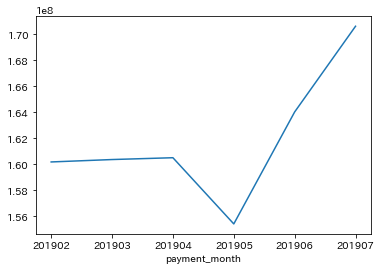

In [83]:
# 月ごとの売上を集計
join_data.groupby('payment_month').sum()['price'].plot()
join_data.groupby('payment_month').sum()['price']

In [84]:
# 5月に落ち込んでいるが、6，7月には回復している。8月には2億円くらいの売上は期待できそう

In [87]:
# 商品別（5種類）の売上を見てみる
join_data.groupby(['payment_month', 'item_name']).sum()[['price', 'quantity']]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [89]:
# ピボットテーブルで表示する
# 行に商品名、列に年月データを設定。集計したい数値はprice,quantityの集計結果。
pd.pivot_table(join_data, index = 'item_name', columns = 'payment_month', values = ['price', 'quantity'], aggfunc='sum')

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

In [104]:
# グラフで可視化する
graph_data = pd.pivot_table(join_data, index = 'payment_month', columns = 'item_name', values = 'price', aggfunc='sum')

In [106]:
graph_data

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000
201907,25250000,28220000,19440000,26100000,71610000


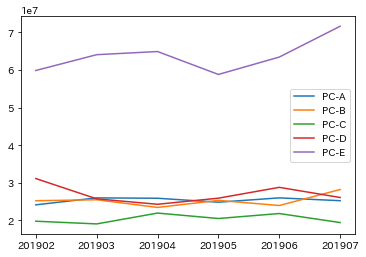

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(graph_data.index), graph_data["PC-A"], label='PC-A')
plt.plot(list(graph_data.index), graph_data["PC-B"], label='PC-B')
plt.plot(list(graph_data.index), graph_data["PC-C"], label='PC-C')
plt.plot(list(graph_data.index), graph_data["PC-D"], label='PC-D')
plt.plot(list(graph_data.index), graph_data["PC-E"], label='PC-E')
plt.legend()  

In [108]:
# PC-Eが売り上げをけん引しており、今後も売れ行きは好調と思われる
# PC-Cは半年間通して、売上は芳しくない